# Simple notebook for analyzing midway cis-eQTL effect on longevity

In [103]:
import pandas as pd

In [104]:
midway_model_table = pd.read_csv("../data/midway-survival-model-table.csv")

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

/var/folders/ny/6zf1tq6n1cb0l7g7ryxbzm0h0000gn/T/ipykernel_88356/1290679250.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-deep")


In [106]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.duration.hazard_regression import PHReg

In [108]:
replacement_map = {
    2: 1,
    1: 0,
}
midway_model_table["death"] = midway_model_table["censored"].map(replacement_map)

In [109]:
surv_df = midway_model_table

In [111]:
midway_00 = surv_df[surv_df["genotype"] == "Midway_00_"]
midway_11 = surv_df[surv_df["genotype"] == "Midway_11_"]

In [112]:
sf_00 = sm.SurvfuncRight(midway_00["lifespan"], midway_00["death"])
sf_11 = sm.SurvfuncRight(midway_11["lifespan"], midway_11["death"])

/Users/wolf/git/midway-code/.venv/lib/python3.11/site-packages/statsmodels/duration/survfunc.py:546: RuntimeWarning: divide by zero encountered in log
  denom = np.sqrt(nn) * np.log(self.surv_prob)


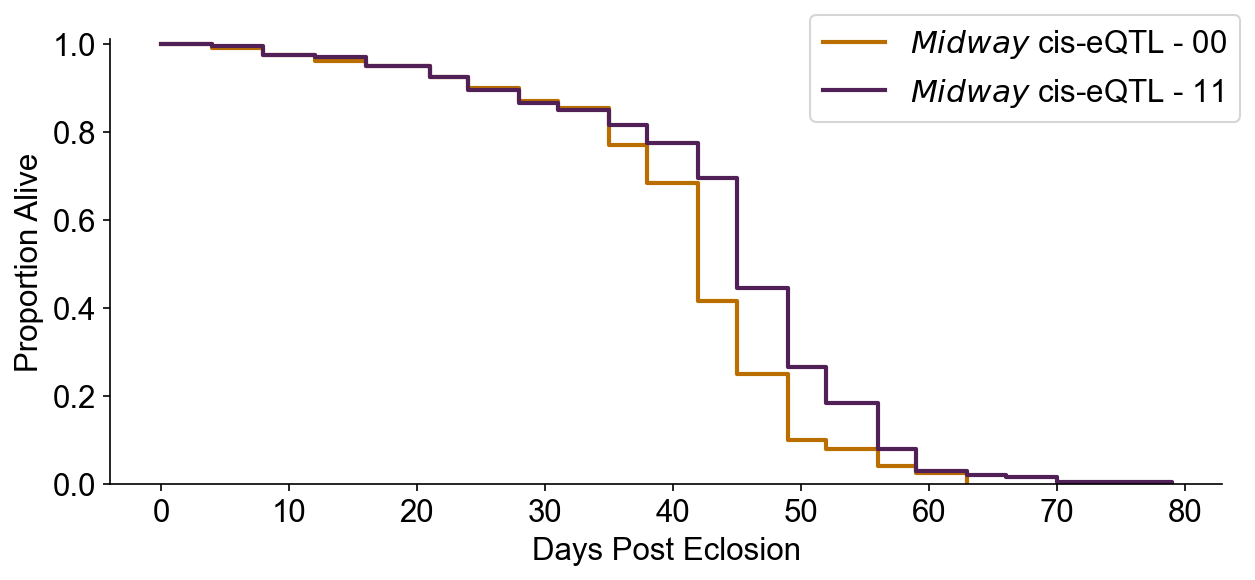

In [113]:
import palettable as pal

labels = ["$\it{Midway}$ cis-eQTL - 00", "$\it{Midway}$ cis-eQTL - 11"]
fig, ax = plt.subplots(figsize=(8.5, 4))
#  00
line_00 = sf_00.plot(ax=ax)
lcb, ucb = sf_00.simultaneous_cb()
# ax.fill_between(sf_00.surv_times, lcb, ucb, color=pal.wesanderson.GrandBudapest4_5.mpl_colors[0], alpha=0.5)

# 11
line_11 = sf_11.plot(ax=ax)
lcb, ucb = sf_11.simultaneous_cb()
# ax.fill_between(sf_11.surv_times, lcb, ucb, color=pal.wesanderson.GrandBudapest4_5.mpl_colors[1], alpha=0.5)

# Cleaning
ax.set_ylabel("Proportion Alive")
ax.set_xlabel("Days Post Eclosion")
# ax.set_title("Midway survival")
li = ax.get_lines()
li[0].set_color(pal.wesanderson.GrandBudapest4_5.mpl_colors[0])
li[2].set_color(pal.wesanderson.GrandBudapest4_5.mpl_colors[1])
plt.figlegend((li[0], li[2]), labels, loc="upper right")
sns.despine()
plt.tight_layout()
plt.savefig("../figures/midway-survival.png", dpi=600, transparent=True)

In [114]:
results = PHReg.from_formula(
    "lifespan ~ C(sex) + C(genotype)", data=surv_df, status="death"
).fit()
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: PHReg
===============================================================================
Model:                          PH Reg              Sample size:            400
Dependent variable:             lifespan            Num. events:            400
Ties:                           Breslow                                        
-------------------------------------------------------------------------------
                           log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------
C(sex)[T.M]                0.2408    0.1013 1.2723  2.3774 0.0174 1.0432 1.5517
C(genotype)[T.Midway_11_] -0.3905    0.1017 0.6767 -3.8380 0.0001 0.5544 0.8261
===============================================================================
Confidence intervals are for the hazard ratios
"""